[View in Colaboratory](https://colab.research.google.com/github/backpropagator/Pytorch-implementation/blob/master/convolution.ipynb)

## #Importing  and installing Libraries

In [0]:
!pip3 install torch torchvision

In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

### Downloading Fashion Mnist Data 

In [5]:
train=torchvision.datasets.FashionMNIST('./data',train=True,download=True,transform=transforms.ToTensor())
test=torchvision.datasets.FashionMNIST('./data',train=False,download=True,transform=transforms.ToTensor())


Processing...
Done!


### Plotting Images to visualize the data

In [0]:
import matplotlib.pyplot as plt

In [11]:
img,label=train[1069]
print(img.size())
print(label)

torch.Size([1, 28, 28])
tensor(7)


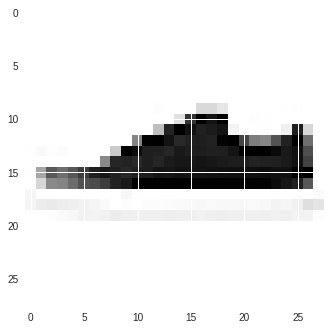

In [12]:
plt.imshow(img.reshape(28,28))

In [0]:
num_epochs=5
num_class=10
batch_size=64
lr=0.001



In [0]:
trainloader=torch.utils.data.DataLoader(dataset=train,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(dataset=test,batch_size=batch_size,shuffle=False)

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


In [0]:
dataiter=iter(trainloader)
images,labels=dataiter.next()

9 8 7 1 5 8 9 9 9 4 5 7 6 7 5 3 1 1 1 7 9 0 6 3 0 4 2 4 9 2 9 0 9 0 5 6 6 9 4 0 5 6 0 9 2 1 2 8 7 3 8 7 1 1 4 8 2 7 1 4 9 2 0 5


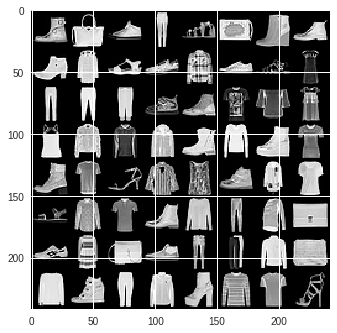

In [109]:
imshow(torchvision.utils.make_grid(images))
print(' '.join('%1i'% labels[j] for j in range(64)))

## Model Initialization
###

*  ** Layer 1-   **

1.   Convolution layer( 16 feature map, kernel of size (5,5) , (2,2) padding , with stride of 1)
2.   Batch Normalisation Layer

*  Max Pool Layer with kernel of (2,2) with stride of 2




*   **Layer2-**


*   Same Features as Layer 1

*  **Fully Connected Layer**


 **Loss is Cross Entropy loss **

### Two Different Optimizers are used -RmsProp and Adam 

In [0]:
class ConvNet(nn.Module):
  def __init__(self,num_class=10):
    super(ConvNet,self).__init__()
    self.layer1=nn.Sequential(nn.Conv2d(1,16,kernel_size=5,stride=1,padding=2),
                              nn.BatchNorm2d(16),
                              nn.ReLU(),
                              nn.MaxPool2d(kernel_size=2,stride=2))
    self.layer2=nn.Sequential(nn.Conv2d(16,32,kernel_size=5,stride=1,padding=2),
                              nn.BatchNorm2d(32),
                              nn.ReLU(),
                              nn.MaxPool2d(kernel_size=2,stride=2))
    self.fc=nn.Linear(7*7*32,num_class)
    
  def forward(self,x):
    out1=self.layer1(x)
    out2=self.layer2(out1)
    out3=out2.reshape(out2.size(0),-1)
    out3=self.fc(out3)
    return out3
  

In [0]:
model=ConvNet(num_class)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=lr)

In [114]:
optimizer.defaults

{'amsgrad': False,
 'betas': (0.9, 0.999),
 'eps': 1e-08,
 'lr': 0.001,
 'weight_decay': 0}

In [115]:
model.fc.weight

Parameter containing:
tensor([[ 0.0244, -0.0193,  0.0081,  ...,  0.0031,  0.0136, -0.0125],
        [-0.0202,  0.0079, -0.0012,  ..., -0.0141, -0.0150, -0.0111],
        [ 0.0073, -0.0029, -0.0248,  ..., -0.0045, -0.0149,  0.0187],
        ...,
        [-0.0046, -0.0097,  0.0239,  ...,  0.0019,  0.0001, -0.0190],
        [ 0.0113,  0.0139, -0.0051,  ..., -0.0198, -0.0184,  0.0226],
        [ 0.0117,  0.0142,  0.0217,  ...,  0.0228, -0.0069,  0.0009]],
       requires_grad=True)

In [116]:
total_step=len(trainloader)
total_step

938

In [0]:
plot_loss=np.ones(num_epochs*len(trainloader))


In [118]:
plot_loss.shape

(4690,)

###Training Process

In [119]:
for epochs in range(num_epochs):
  for i,(images,labels) in enumerate(trainloader):
    output=model(images)
    loss=criterion(output,labels)
    plot_loss[938*epochs+i]=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epochs+1, num_epochs, i+1, total_step, loss.item()))
                  
                   
    

Epoch [1/5], Step [100/938], Loss: 0.5166
Epoch [1/5], Step [200/938], Loss: 0.3184
Epoch [1/5], Step [300/938], Loss: 0.3120
Epoch [1/5], Step [400/938], Loss: 0.3567
Epoch [1/5], Step [500/938], Loss: 0.5471
Epoch [1/5], Step [600/938], Loss: 0.2909
Epoch [1/5], Step [700/938], Loss: 0.2898
Epoch [1/5], Step [800/938], Loss: 0.4200
Epoch [1/5], Step [900/938], Loss: 0.4152
Epoch [2/5], Step [100/938], Loss: 0.2215
Epoch [2/5], Step [200/938], Loss: 0.3274
Epoch [2/5], Step [300/938], Loss: 0.2073
Epoch [2/5], Step [400/938], Loss: 0.3144
Epoch [2/5], Step [500/938], Loss: 0.3960
Epoch [2/5], Step [600/938], Loss: 0.4029
Epoch [2/5], Step [700/938], Loss: 0.2363
Epoch [2/5], Step [800/938], Loss: 0.1059
Epoch [2/5], Step [900/938], Loss: 0.1393
Epoch [3/5], Step [100/938], Loss: 0.2224
Epoch [3/5], Step [200/938], Loss: 0.5751
Epoch [3/5], Step [300/938], Loss: 0.3383
Epoch [3/5], Step [400/938], Loss: 0.1371
Epoch [3/5], Step [500/938], Loss: 0.1455
Epoch [3/5], Step [600/938], Loss:

## Plotting and Accuracy For Different  optimization algorithm

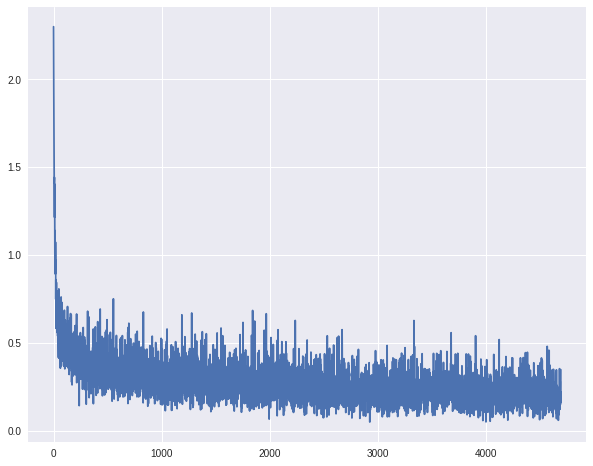

In [120]:
plt.figure(figsize=(10,8))
plt.plot(plot_loss) # for Adam

In [121]:
model.eval()
with torch.no_grad():
  correct=0
  total=0
  for images,labels in testloader:
    output=model(images)
    _,predicted=torch.max(output.data,1)
    total+=labels.size(0)
    correct+=(labels==predicted).sum().item()
print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))    

Test Accuracy of the model on the 10000 test images: 90.48 %


In [159]:
predicted

tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 7])

In [160]:
labels

tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5])

Labels :   3 2 7 5 8 4 5 6 8 9 1 9 1 8 1 5
Predicted: 3 2 7 5 8 4 5 6 8 9 1 9 1 8 1 7


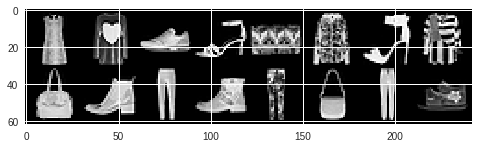

In [166]:
imshow(torchvision.utils.make_grid(images))
print("Labels :  ",' '.join('%1i'% labels[j] for j in range(16)))
print("Predicted:",' '.join('%1i'% predicted[j] for j in range(16)))

In [0]:
model.state_dict()

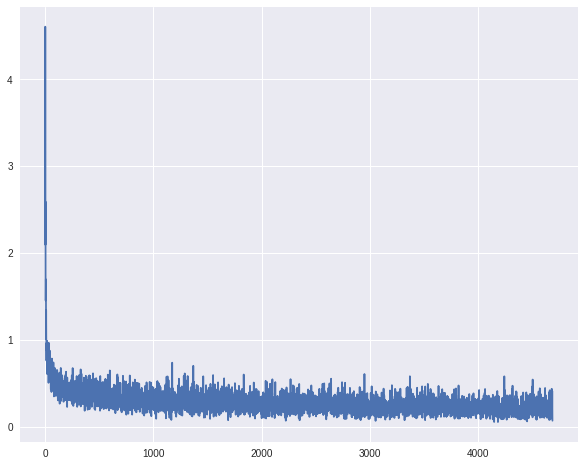

In [104]:
plt.figure(figsize=(10,8))
plt.plot(plot_loss) #for RMSprop 

In [105]:
model.eval()
with torch.no_grad():
  correct=0
  total=0
  for images,labels in testloader:
    output=model(images)
    _,predicted=torch.max(output.data,1)
    total+=labels.size(0)
    correct+=(labels==predicted).sum().item()
print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))    

Test Accuracy of the model on the 10000 test images: 89.88 %
